
Call:
glm(formula = treatment ~ female + age + pim2 + pelod + p_bloodculture + 
    MODS + comorbidity + rf_pneumonia + rf_sepsis + rf_aspiration + 
    rf_transfusion + rf_trauma + rf_drowning + d1_oi, family = binomial(), 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1420  -0.8055  -0.5648   1.0090   2.2904  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.038230   0.580777  -5.231 1.68e-07 ***
female           0.299059   0.247560   1.208   0.2270    
age             -0.066018   0.031870  -2.071   0.0383 *  
pim2             0.005973   0.007173   0.833   0.4050    
pelod            0.016945   0.015922   1.064   0.2872    
p_bloodculture   0.549247   0.364778   1.506   0.1321    
MODS             0.217869   0.293656   0.742   0.4581    
comorbidity      0.369977   0.256957   1.440   0.1499    
rf_pneumonia     0.821962   0.469746   1.750   0.0802 .  
rf_sepsis       -0.641138   0.350376  -1.830  

[[1]]
[1] 0.7634083

                            Stratified by treatment
                             0             1             p      test
  n                            258           123                    
  female (mean (sd))          0.44 (0.50)   0.54 (0.50)   0.084     
  age (mean (sd))             3.54 (4.48)   3.10 (4.02)   0.360     
  pim2 (mean (sd))           15.39 (21.09) 21.70 (25.20)  0.011     
  pelod (mean (sd))           8.81 (9.65)  11.80 (10.23)  0.006     
  p_bloodculture (mean (sd))  0.15 (0.36)   0.19 (0.39)   0.377     
  comorbidity (mean (sd))     0.48 (0.50)   0.62 (0.49)   0.015     
  rf_pneumonia (mean (sd))    0.81 (0.40)   0.87 (0.34)   0.125     
  rf_sepsis (mean (sd))       0.26 (0.44)   0.26 (0.44)   0.992     
  rf_aspiration (mean (sd))   0.07 (0.25)   0.03 (0.18)   0.183     
  rf_transfusion (mean (sd))  0.02 (0.12)   0.01 (0.09)   0.556     
  rf_trauma (mean (sd))       0.02 (0.12)   0.00 (0.00)   0.166     
  rf_drowning (mean (sd))     

Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”


Call:
matchit(formula = treatment ~ female + age + pim2 + pelod + p_bloodculture + 
    MODS + comorbidity + rf_pneumonia + rf_sepsis + rf_aspiration + 
    rf_transfusion + rf_trauma + rf_drowning, data = mydata_wth_pscore, 
    method = "nearest", distance = mydata_wth_pscore$pscore)

Summary of balance for all data:
               Means Treated Means Control SD Control Mean Diff eQQ Med
distance              0.4443        0.2649     0.1675    0.1793  0.1812
female                0.5366        0.4419     0.4976    0.0947  0.0000
age                   3.0996        3.5354     4.4804   -0.4358  0.3100
pim2                 21.6967       15.3930    21.0875    6.3037  2.7000
pelod                11.7967        8.8101     9.6527    2.9867  1.0000
p_bloodculture        0.1870        0.1512     0.3589    0.0358  0.0000
MODS                  0.4472        0.3450     0.4763    0.1022  0.0000
comorbidity           0.6179        0.4845     0.5007    0.1334  0.0000
rf_pneumonia          0.8699  

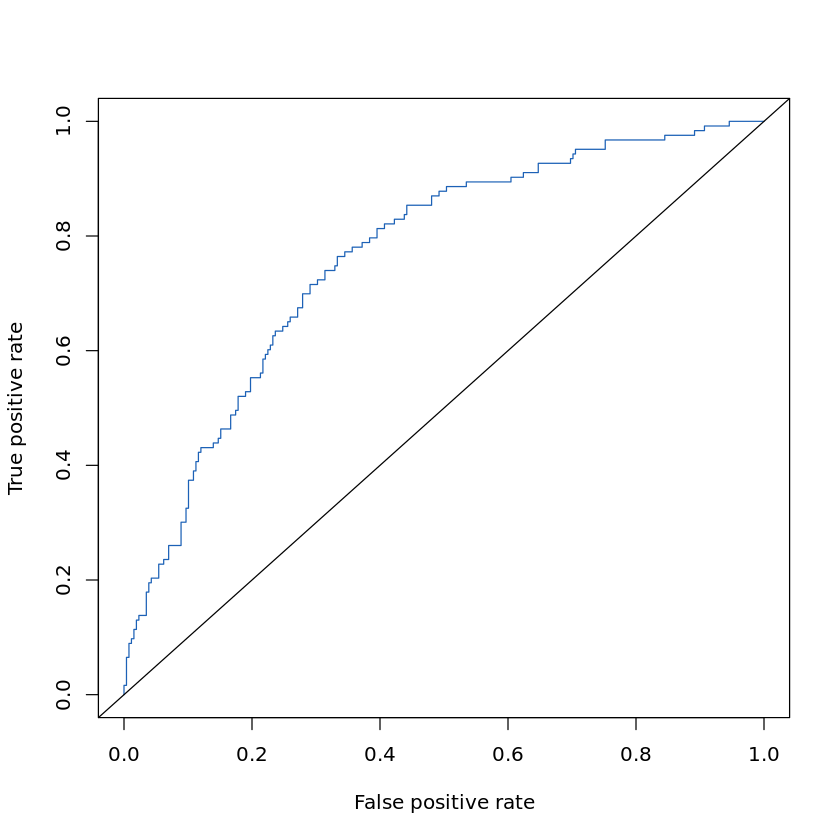

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

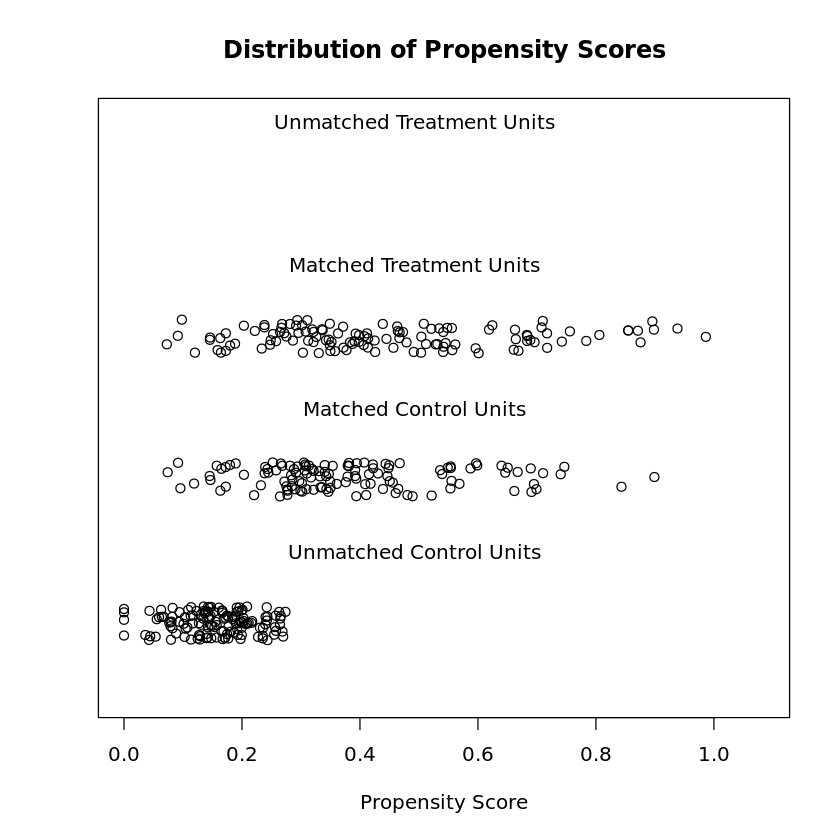

                            Stratified by treatment
                             0             1             p      test
  n                            123           123                    
  female (mean (sd))          0.56 (0.50)   0.54 (0.50)   0.702     
  age (mean (sd))             2.96 (3.96)   3.10 (4.02)   0.788     
  pim2 (mean (sd))           19.64 (24.28) 21.70 (25.20)  0.515     
  pelod (mean (sd))          11.75 (11.14) 11.80 (10.23)  0.971     
  p_bloodculture (mean (sd))  0.16 (0.37)   0.19 (0.39)   0.616     
  comorbidity (mean (sd))     0.62 (0.49)   0.62 (0.49)   1.000     
  rf_pneumonia (mean (sd))    0.85 (0.35)   0.87 (0.34)   0.713     
  rf_sepsis (mean (sd))       0.28 (0.45)   0.26 (0.44)   0.775     
  rf_aspiration (mean (sd))   0.03 (0.18)   0.03 (0.18)   1.000     
  rf_transfusion (mean (sd))  0.02 (0.13)   0.01 (0.09)   0.563     
  rf_trauma (mean (sd))       0.00 (0.00)   0.00 (0.00)   NaN       
  rf_drowning (mean (sd))     0.03 (0.18)   0.03 (0

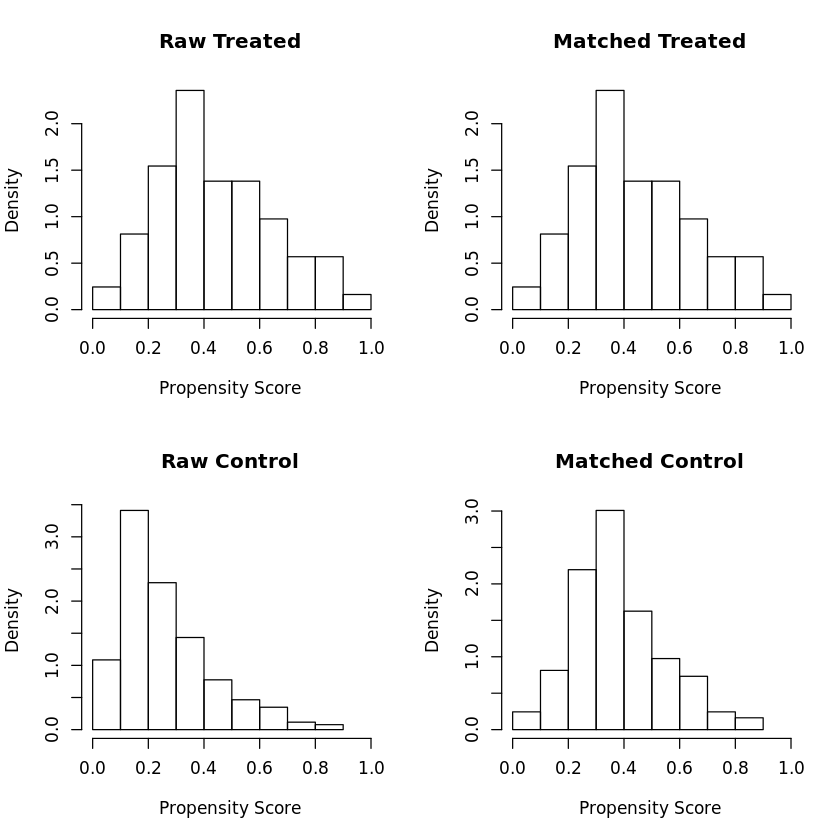

In [7]:
## Load packages and data
library(tableone)
library(MatchIt)
library(Matching)
library(pROC)
library(ROCR)
library(ggplot2)
library(epitools)
library(dplyr)

####loading KKH ICU data
kkh_data <- read.csv("PICUARD_DATA_1208.csv")
df<-data.frame(kkh_data)
kkh<-df[!is.na(df$d1_oi),]
####check column names
#colnames(kkh, do.NULL = FALSE)

####select features
ID<-kkh$Study.ID
female<-as.numeric(kkh$Gender=='Female')
age<-kkh$Age
pim2<-kkh$pim2
pelod<-kkh$pelod
p_bloodculture<-as.numeric(kkh$Positive_blood_culture=='Yes')

#comorbidity
comorbidity<-kkh$comorbidity

#risk factor of ARDS
rf_pneumonia<-as.numeric(kkh$PNEUMONIA=='Checked')
rf_sepsis<-as.numeric(kkh$SEPSIS=='Checked')
rf_aspiration<-as.numeric(kkh$ASPIRATION=='Checked')
rf_transfusion<-as.numeric(kkh$TRANSFUSION=='Checked')
rf_trauma<-as.numeric(kkh$TRAUMA=='Checked')
rf_drowning<-as.numeric(kkh$DROWNING=='Checked')

#other useful features
#cardiac_failure<-as.numeric(kkh$Cardiac.failure.or.fluid.overload=='Yes')
MODS<-as.numeric(kkh$MODS=='Yes')
#Received_pulmonary_vasodilators<-as.numeric(kkh$Received_pulmonary_vasodilators=='Yes')
#blood gas labtest
#D1_FiO2<-kkh$D1_FiO2
#D1_SpO2<-kkh$D1_SpO2
d1_oi<-kkh$d1_oi
#treatment and mortality
#treatment<-kkh$hfv
treatment<-as.numeric(kkh$Received_HFV=='Yes')
died<-kkh$died_in_ICU

####new dataset
mydata<-cbind(ID,female,age,pim2,pelod,p_bloodculture,comorbidity,rf_pneumonia,rf_sepsis,rf_aspiration,rf_transfusion
              ,rf_trauma,rf_drowning,MODS,d1_oi
              ,treatment,died)

mydata<-data.frame(mydata)
xvars<-c("female","age","pim2","pelod","p_bloodculture","comorbidity","rf_pneumonia"
         ,"rf_sepsis","rf_aspiration" , "rf_transfusion", "rf_trauma", "rf_drowning","MODS","d1_oi"
         )
#mydata_noNA <- na.omit(mydata)
#fit a propensity score model with logistic regression
psmodel <-glm(treatment~female+age+pim2+pelod+p_bloodculture+MODS+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+d1_oi
                 , data = mydata,family=binomial())
#show coefficients etc
summary(psmodel)

#create propensity score
pscore<-psmodel$fitted.values
#pscore<-fitted(psmodel) 

label<-mydata$treatment
perf<- ROCR::prediction(pscore, label)
psm_auc<-ROCR::performance(ROCR::prediction(pscore, label), "auc")@y.values[1]
print(psm_auc)
roc.perf = performance(perf, measure = "tpr", x.measure = "fpr")
plot(roc.perf,col="#1c61b6",percent=TRUE)
abline(a=0, b= 1)

#########################################
#look at a table 1
#mydata before matching
table1_unmatched<- CreateTableOne(vars=xvars, strata="treatment", data = mydata)
## include standardized mean difference (SMD)
print(table1_unmatched, smd=FALSE)


#colnames(kkh, do.NULL = TRUE, prefix = "col")
##########################################
## Using the Matchit for propensity score, nearest neighbor matching
mydata_wth_pscore<-data.frame(cbind(mydata,pscore))
m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+MODS+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning, data = mydata_wth_pscore,              
                 method = "nearest", distance=mydata_wth_pscore$pscore)
summary(m.out)

#propensity score plots
plot(m.out, type="jitter")
plot(m.out, type="hist")
########################################
#use the Matching package
#do greedy matching on propensity score
#psmatch<-Match(Tr=mydata$treatment,M=1, X=pscore,replace=FALSE,caliper=0.2)
#matched<-mydata[unlist(psmatch[c("index.treated","index.control")]),]
#summary(matched)
########################################
#look at Table1 after matching

#Matching Table1
#matchedtab<-CreateTableOne(vars=xvars, strata="treatment",data=matched)
#print(matchedtab, smd=TRUE)

#MatchIt Table1
table1_matched<- CreateTableOne(vars=xvars, strata="treatment", data = match.data(m.out, "all"))
## include standardized mean difference (SMD)
print(table1_matched, smd=FALSE)


p_score,treatment_1
0.2957362,1
0.4566688,1
0.8058621,1
0.4387311,1
0.3984541,1
0.8546125,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


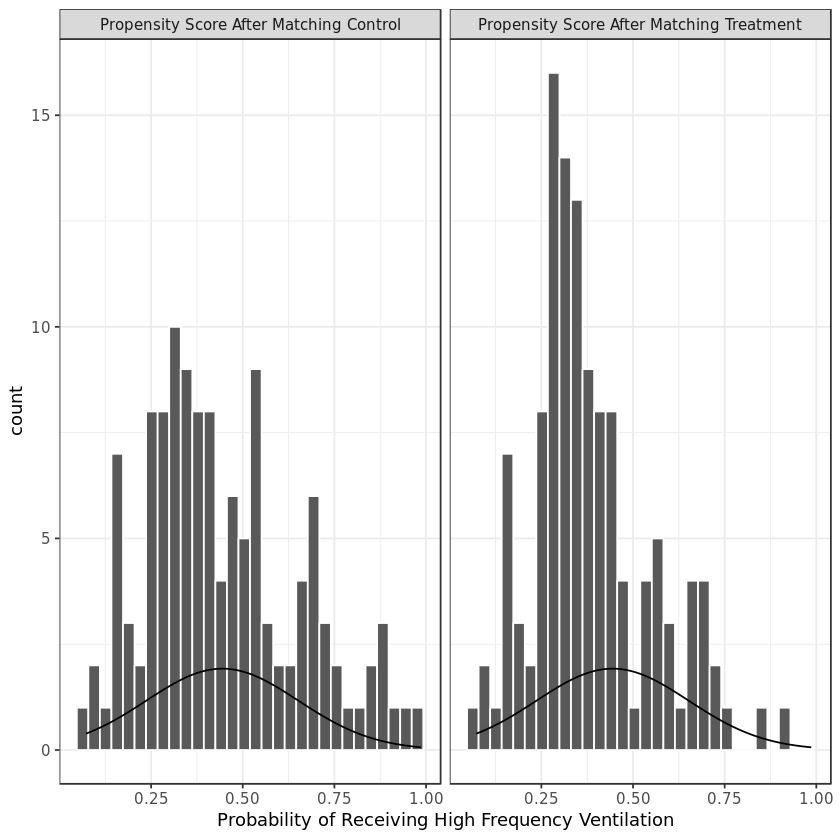

In [8]:
############################################
#checking balance using pscore plots

#using Matching package
#matched_treated<-mydata_wth_pscore[mydata_wth_pscore$ID %in% matched$ID[matched$treatment==1],]['pscore'][,1]
#matched_control<-mydata_wth_pscore[mydata_wth_pscore$ID %in% matched$ID[matched$treatment==0],]['pscore'][,1]

#using MatchIt package
matched_treated<-mydata_wth_pscore[mydata_wth_pscore$ID %in% match.data(m.out, "all")$ID[match.data(m.out, "all")$treatment==1],]['pscore'][,1]
matched_control<-mydata_wth_pscore[mydata_wth_pscore$ID %in% match.data(m.out, "all")$ID[match.data(m.out, "all")$treatment==0],]['pscore'][,1]

pscore_outcome<-rbind(cbind(p_score=matched_treated,treatment_1=1),cbind(p_score=matched_control,treatment_1=0))
prs_df<-data.frame(pscore_outcome)
head(prs_df)
###############################################
#checking balance after matching by ploting the pscore

#dataframe = data.frame(x = matched_treated, x2 = matched_control)
#g = ggplot(dataframe, aes(x)) + geom_histogram( aes(x = x, y = ..density..),binwidth = diff(range(dataframe$x))/30, fill="skyblue") + geom_histogram( aes(x = x2, y = -..density..), binwidth = diff(range(dataframe$x))/30, fill= "lightgreen")
#print(g)

##use histogram
#hist(matched_treated,breaks=12,ylim=c(0,40),col='skyblue',border=F,xlab="Propensity Score", main="Propensity Score After Matching")
#hist(matched_control,add=T,col=scales::alpha('red',.5),border=F)
#x_trt<-seq(min(matched_treated),max(matched_treated),length=length(matched_treated))
#y_trt<-dnorm(x_trt,mean=mean(matched_treated),sd=sd(matched_treated)) 
#y_trt <- y_trt*diff(h$mids[1:2])*length(matched_treated)
#lines(x_trt, y_trt, col="blue", lwd=1)
#x_con<-seq(min(matched_control),max(matched_control),length=length(matched_control))
#y_con<-dnorm(x_con,mean=mean(matched_control),sd=sd(matched_control)) 
#y_con <- y_con*diff(h$mids[1:2])*length(matched_control)
#lines(x_con, y_con, col="red", lwd=1)

# Simulate some data. Individuals' heights in cm.
n        <- length(matched_treated)
mean     <- mean(matched_treated)
sd       <- sd(matched_treated)
binwidth <- 2
height <- rnorm(n, mean, sd)

labs <- paste("Propensity Score After Matching", c("Control", "Treatment"))
prs_df %>%
  mutate(treatment_1 = ifelse(treatment_1 == 1, labs[1], labs[2]))%>%
  ggplot(aes(x = p_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~treatment_1) +
  xlab("Probability of Receiving High Frequency Ventilation") +
  theme_bw()+
stat_function(fun = dnorm, args = list(mean = mean, sd = sd))

In [9]:
###################################
#outcome analysis
#Matching package
#y_treatment<-matched1$died[matched$treatment==1]
#y_control<-matched1$died[matched$treatment==0]

#MatchIt package
y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 



#pairwise difference for continuous data
#diffy<-y_trt-y_con
#paired t-test
#t.test(diffy)

table(y_treatment,y_control)
#McNemar test
mcnemar.test(y_treatment, y_control)

########## calculate Odd's ratio here!
a<-length(y_treatment[y_treatment==1])
b<-length(y_control[y_control==1])
c<-length(y_treatment[y_treatment==0])
d<-length(y_control[y_control==0])

oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2))


           y_control
y_treatment  0  1
          0 52 22
          1 29 20


	McNemar's Chi-squared test with continuity correction

data:  y_treatment and y_control
McNemar's chi-squared = 0.70588, df = 1, p-value = 0.4008


,Disease1,Disease2,Total
Exposed1,49,74,123
Exposed2,42,81,123
Total,91,155,246
,estimate,lower,upper
Exposed1,1.000000,NA,NA
Exposed2,1.275219,0.7583369,2.151681
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.3594709,0.4282218,0.3552569


In [22]:
##############################################

m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata, 
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=0.1)

#psmatch<-Match(Tr=mydata$treatment,M=1, X=pscore,replace=FALSE,caliper=0.01)
#matched<-mydata[unlist(psmatch[c("index.treated","index.control")]),]

#MatchIt package
y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 

#Matching package
#y_treatment<-matched$died[matched$treatment==1]
#y_control<-matched$died[matched$treatment==0]

a<-length(y_treatment[y_treatment==1])
b<-length(y_control[y_control==1])
c<-length(y_treatment[y_treatment==0])
d<-length(y_control[y_control==0])

oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2))




Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

,Disease1,Disease2,Total
Exposed1,26,60,86
Exposed2,37,49,86
Total,63,109,172
,estimate,lower,upper
Exposed1,1.0000000,NA,NA
Exposed2,0.5765563,0.3046182,1.078876
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.08515071,0.1131678,0.08170142


In [20]:
############################################

for(i in 1:50){
    m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata_wth_pscore, 
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=0.01*i)

    #Matching package
    y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
    y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 


    a<-length(y_treatment[y_treatment==1])
    b<-length(y_control[y_control==1])
    c<-length(y_treatment[y_treatment==0])
    d<-length(y_control[y_control==0])

    print(oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2)))
    print(i)
    print("---------------------------------")
    
}



Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       21       34    55
  Exposed2       23       32    55
  Total          44       66   110

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8609646 0.3972068 1.858215

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7026915    0.8458254  0.6970916

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 1
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       22       44    66
  Exposed2       25       41    66
  Total          47       85   132

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 0.821786 0.3987288 1.684532

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.5918933    0.7164136  0.5855348

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 2
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       24       48    72
  Exposed2       32       40    72
  Total          56       88   144

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.6278687 0.3161077 1.234045

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.1774644    0.2313431  0.1714602

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 3
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       26       47    73
  Exposed2       30       43    73
  Total          56       90   146

$measure
          odds ratio with 95% C.I.
Predictor   estimate    lower    upper
  Exposed1 1.0000000       NA       NA
  Exposed2 0.7946851 0.404002 1.555033

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.5023523    0.6098284  0.4959965

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 4
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       26       49    75
  Exposed2       32       43    75
  Total          58       92   150

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.7152652 0.3664401 1.385991

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.3211986    0.4019638  0.3144256

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 5
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       25       53    78
  Exposed2       33       45    78
  Total          58       98   156

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.6458258 0.3324068 1.242647

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.1908658    0.2460877  0.1850605

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 6
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       27       52    79
  Exposed2       31       48    79
  Total          58      100   158

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower   upper
  Exposed1 1.000000        NA      NA
  Exposed2 0.805558 0.4181899 1.54427

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.5150185    0.6206881  0.5091265

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 7
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       27       52    79
  Exposed2       30       49    79
  Total          57      101   158

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8493492 0.4402799 1.632449

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2   0.624146    0.7405609  0.6191928

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 8
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       28       52    80
  Exposed2       29       51    80
  Total          57      103   160

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9474128 0.4931631 1.817874

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8707198            1  0.8688782

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 9
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       28       54    82
  Exposed2       30       52    82
  Total          58      106   164

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8996117 0.4712011 1.713492

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7473493    0.8703535  0.7439313

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 10
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       31       51    82
  Exposed2       28       54    82
  Total          59      105   164

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 1.170639 0.6162984 2.231143

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.6301846    0.7450285  0.6254681

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 11
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       32       53    85
  Exposed2       31       54    85
  Total          63      107   170

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 1.051292 0.5618507 1.969125

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8754626            1   0.873823

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 12
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       30       54    84
  Exposed2       26       58    84
  Total          56      112   168

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 1.236962 0.6487104 2.370592

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.5184742    0.6236414  0.5126908

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 13
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       29       57    86
  Exposed2       31       55    86
  Total          60      112   172

$measure
          odds ratio with 95% C.I.
Predictor   estimate    lower    upper
  Exposed1 1.0000000       NA       NA
  Exposed2 0.9034425 0.479655 1.698005

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2   0.752214      0.87298  0.7489909

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 14
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       31       56    87
  Exposed2       37       50    87
  Total          68      106   174

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.7498117 0.4043016 1.383244

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.3570501    0.4373631  0.3512228

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 15
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       31       57    88
  Exposed2       34       54    88
  Total          65      111   176

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8648004 0.4659531 1.600504

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.6436021    0.7548974  0.6393886

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 16
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       33       56    89
  Exposed2       32       57    89
  Total          65      113   178

$measure
          odds ratio with 95% C.I.
Predictor  estimate    lower    upper
  Exposed1 1.000000       NA       NA
  Exposed2 1.049258 0.567786 1.940818

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8778374            1  0.8762906

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 17
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       31       58    89
  Exposed2       32       57    89
  Total          63      115   178

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9524266 0.5126759 1.767638

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8770273            1  0.8754466

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 18
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       32       59    91
  Exposed2       35       56    91
  Total          67      115   182

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower   upper
  Exposed1 1.0000000        NA      NA
  Exposed2 0.8687606 0.4728241 1.59196

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2   0.648777    0.7586839  0.6447455

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 19
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       32       59    91
  Exposed2       37       54    91
  Total          69      113   182

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.7930094 0.4325323 1.447771

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.4503146    0.5412696  0.4449212

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 20
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       32       59    91
  Exposed2       32       59    91
  Total          64      118   182

$measure
          odds ratio with 95% C.I.
Predictor  estimate    lower    upper
  Exposed1 1.000000       NA       NA
  Exposed2 1.000004 0.541818 1.845638

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2          1            1          1

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 21
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       31       59    90
  Exposed2       32       58    90
  Total          63      117   180

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9527052 0.5137851 1.764803

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8773883            1  0.8758209

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 22
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       32       59    91
  Exposed2       34       57    91
  Total          66      116   182

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9099547 0.4946046 1.671063

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7606984    0.8775411  0.7578048

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 23
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       31       60    91
  Exposed2       35       56    91
  Total          66      116   182

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8278855 0.4492936 1.519928

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.5423696    0.6438558  0.5374132

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 24
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       32       59    91
  Exposed2       33       58    91
  Total          65      117   182

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9536218 0.5175798 1.755466

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8785789            1   0.877059

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 25
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       32       59    91
  Exposed2       33       58    91
  Total          65      117   182

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9536218 0.5175798 1.755466

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8785789            1   0.877059

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 26
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       33       59    92
  Exposed2       33       59    92
  Total          66      118   184

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 1.000005 0.5451659 1.834304

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2          1            1          1

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 27
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       33       60    93
  Exposed2       33       60    93
  Total          66      120   186

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 1.000005 0.5461578 1.830973

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2          1            1          1

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 28
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       33       60    93
  Exposed2       34       59    93
  Total          67      119   186

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9547548 0.5222845 1.743803

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8800684            1  0.8786053

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 29
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       34       59    93
  Exposed2       35       58    93
  Total          69      117   186

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9552985 0.5246062 1.738129

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8807882            1  0.8793537

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 30
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       35       58    93
  Exposed2       32       61    93
  Total          67      119   186

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 1.149081 0.6294457 2.103382

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.6507658    0.7601367  0.6467998

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 31
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       33       60    93
  Exposed2       34       59    93
  Total          67      119   186

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9547548 0.5222845 1.743803

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8800684            1  0.8786053

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 32
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       33       61    94
  Exposed2       35       59    94
  Total          68      120   188

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9125931 0.5008411 1.659912

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7642191     0.879427  0.7614529

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 33
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       34       61    95
  Exposed2       37       58    95
  Total          71      119   190

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8746058 0.4832922 1.578982

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2   0.656563    0.7643602  0.6527979

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 34
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       35       60    95
  Exposed2       34       61    95
  Total          69      121   190

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1  1.00000        NA       NA
  Exposed2  1.04621 0.5771413 1.898111

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2     0.8815            1  0.8800901

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 35
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       34       61    95
  Exposed2       36       59    95
  Total          70      120   190

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9141097 0.5044992 1.653485

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7662644    0.8805206  0.7635726

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 36
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       36       59    95
  Exposed2       32       63    95
  Total          68      122   190

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 1.199602 0.6608161 2.185107

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.5496758    0.6499845  0.5449503

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 37
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       37       58    95
  Exposed2       35       60    95
  Total          72      118   190

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 1.092872 0.6062383 1.973154

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7675177      0.88119  0.7648726

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 38
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       36       60    96
  Exposed2       34       62    96
  Total          70      122   192

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower   upper
  Exposed1 1.000000        NA      NA
  Exposed2 1.093386 0.6055439 1.97749

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7669359    0.8808796  0.7642665

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 39
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       36       61    97
  Exposed2       34       63    97
  Total          70      124   194

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1 1.000000        NA       NA
  Exposed2 1.092816 0.6062843 1.973054

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7675881     0.881228  0.7649401

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 40
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       36       62    98
  Exposed2       38       60    98
  Total          74      122   196

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9173991 0.5126103 1.639382

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7707669    0.8829237  0.7682323

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 41
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       35       64    99
  Exposed2       39       60    99
  Total          74      124   198

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8423749 0.4709651 1.502335

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.5611831    0.6595861  0.5568153

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 42
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       33       67   100
  Exposed2       37       63   100
  Total          70      130   200

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8397063 0.4667802 1.505715

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2   0.557664    0.6566579  0.5531815

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 43
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       32       68   100
  Exposed2       35       65   100
  Total          67      133   200

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8748257 0.4835167 1.578613

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.6568835    0.7645958  0.6531133

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 44
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       33       68   101
  Exposed2       41       60   101
  Total          74      128   202

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.7119144 0.3979986 1.265931

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2   0.247621    0.3066651  0.2426961

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 45
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       33       68   101
  Exposed2       35       66   101
  Total          68      134   202

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9157366 0.5083488 1.646706

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7684941    0.8817123  0.7658694

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 46
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       35       66   101
  Exposed2       38       63   101
  Total          73      129   202

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8799919 0.4931264 1.566848

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.6639167    0.7697003  0.6603859

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 47
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       36       65   101
  Exposed2       35       66   101
  Total          71      131   202

$measure
          odds ratio with 95% C.I.
Predictor  estimate     lower    upper
  Exposed1  1.00000        NA       NA
  Exposed2  1.04407 0.5839927 1.868161

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8841571            1  0.8828395

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 48
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       34       67   101
  Exposed2       36       65   101
  Total          70      132   202

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.9168494 0.5111645 1.641882

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.7700188    0.8825255  0.7674496

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 49
[1] "---------------------------------"


Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1       34       67   101
  Exposed2       37       64   101
  Total          71      131   202

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8785974 0.4904963 1.570089

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2   0.662004    0.7683141  0.6584083

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"
[1] 50
[1] "---------------------------------"


In [8]:
exp(cbind(Odds_and_OR=coef(psmodel), confint(psmodel)))

Waiting for profiling to be done...
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities nume

,Odds_and_OR,2.5 %,97.5 %
(Intercept),5.191061e-02,0.01562324,1.587153e-01
female,1.313859e+00,0.80531598,2.149274e+00
age,9.345923e-01,0.87464257,9.940347e-01
pim2,1.006049e+00,0.99177939,1.020511e+00
pelod,1.016820e+00,0.98508408,1.049374e+00
p_bloodculture,1.704549e+00,0.80787309,3.589598e+00
MODS,1.185132e+00,0.66009187,2.115400e+00
comorbidity,1.520961e+00,0.91605400,2.536869e+00
rf_pneumonia,2.189660e+00,0.88064250,5.712208e+00
rf_sepsis,5.101249e-01,0.24895027,1.014341e+00


In [11]:
a
b
c
d

[1] 37

[1] 32

[1] 63

[1] 68